## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


#### Importing python libraries

In [ ]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline


#### Loading box office mojo data

In [2]:
bom_df = pd.read_csv(
    "zippedData/bom.movie_gross.csv.gz"
)

bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Inspecting the database

In [3]:
# inspecting the database for null 
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### loading the movie database 

In [4]:
tmdb_df= pd.read_csv(
    "zippedData/tmdb.movies.csv.gz"
)

tmdb_df.head()



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Load IMDB data

In [35]:
import zipfile

zip_path = "zippedData/im.db.zip"
extract_to = "data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files after extraction:", os.listdir(extract_to))

Files after extraction: ['im.db']


In [41]:
conn = sqlite3.connect("im.db")


#### Checking whether the imdb data exist

In [7]:
import os
os.path.exists("zippedData/im.db")


True

#### Inspecting the size of the database

In [38]:
os.path.getsize("data/im.db")



169443328

In [14]:
db_path = r"C:\Users\Dell\Documents\flatiron\DataScience\Phase2\Movie-Studio-EDA-Project\zippedData\im.db.zip"

print(os.path.getsize(db_path))

67149708


In [18]:
import zipfile

with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    print(zip_ref.namelist())


['im.db']


In [39]:
conn = sqlite3.connect("data/im.db")
cursor = conn.cursor()


In [40]:
cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


[('table', 'movie_basics', 'movie_basics', 2, 'CREATE TABLE "movie_basics" (\n"movie_id" TEXT,\n  "primary_title" TEXT,\n  "original_title" TEXT,\n  "start_year" INTEGER,\n  "runtime_minutes" REAL,\n  "genres" TEXT\n)'), ('table', 'directors', 'directors', 3, 'CREATE TABLE "directors" (\n"movie_id" TEXT,\n  "person_id" TEXT\n)'), ('table', 'known_for', 'known_for', 4, 'CREATE TABLE "known_for" (\n"person_id" TEXT,\n  "movie_id" TEXT\n)'), ('table', 'movie_akas', 'movie_akas', 5, 'CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\n  "ordering" INTEGER,\n  "title" TEXT,\n  "region" TEXT,\n  "language" TEXT,\n  "types" TEXT,\n  "attributes" TEXT,\n  "is_original_title" REAL\n)'), ('table', 'movie_ratings', 'movie_ratings', 6, 'CREATE TABLE "movie_ratings" (\n"movie_id" TEXT,\n  "averagerating" REAL,\n  "numvotes" INTEGER\n)'), ('table', 'persons', 'persons', 7, 'CREATE TABLE "persons" (\n"person_id" TEXT,\n  "primary_name" TEXT,\n  "birth_year" REAL,\n  "death_year" REAL,\n  "primary_professi

#### Connecting to the unzipped data

In [42]:
# Connect to the unzipped database
conn = sqlite3.connect("data/im.db")

# List all tables in the database
tables = pd.read_sql("""
SELECT name 
FROM sqlite_master
WHERE type='table';
""", conn)

# Print table names
print(tables["name"].tolist())



['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


#### Checking for available tables

In [43]:
pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type='table';
""", conn)


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Loading movie basics and movie ratings

In [44]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)

movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)


#### Previewing the two IMDB tables

In [47]:
movie_basics.head()
movie_ratings.head()
print(movie_ratings, movie_basics)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...

### DATA UNDERSTANDING

#### Inspecting the IMDB tables 

In [48]:
movie_basics.info()
movie_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### Merging the IMBD tables using the primary key

In [49]:
imdb_df = movie_basics.merge(
    movie_ratings,
    on="movie_id",
    how="inner"
)

imdb_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### Cleaning box office data and converting domestic_gross and foreign_gross into numeric datatype

In [51]:
bom_df["domestic_gross"] = pd.to_numeric(
    bom_df["domestic_gross"], errors="coerce"
)

bom_df["foreign_gross"] = pd.to_numeric(
    bom_df["foreign_gross"], errors="coerce"
)


#### Create the total gross

In [52]:
bom_df["total_gross"] = (
    bom_df["domestic_gross"] + bom_df["foreign_gross"]
)


#### Dropping missing totals

In [31]:
bom_clean = bom_df.dropna(subset=["total_gross"])
bom_clean

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


## DATA VISUALIZATION

In [76]:
genre_ratings = (
    imdb_df
    .groupby("genres")["averagerating"]
    .mean()
    .sort_values(ascending=False)
)


### Do longer runtimes affect rating or revenue

In [55]:
print(imdb_df.columns)


Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


C:\Users\Dell\AppData\Local\Temp\ipykernel_23060\378532443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_bin'] = pd.cut(filtered_df['runtime_minutes'], bins)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23060\378532443.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_per_bin = filtered_df.groupby('runtime_bin')['averagerating'].mean()


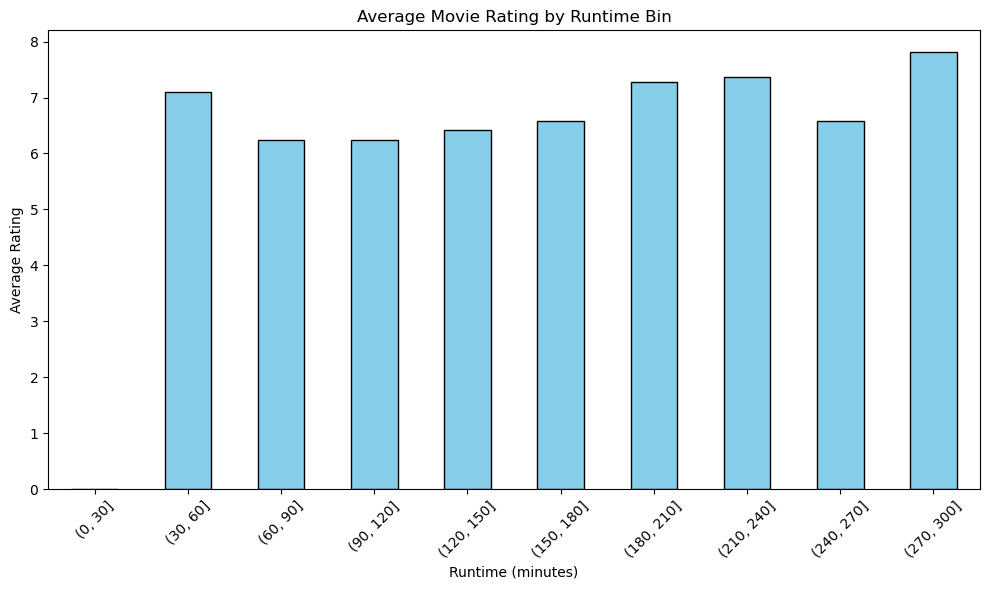

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins for runtime (e.g., every 30 minutes)
bins = np.arange(0, 301, 30)  # 0-30, 30-60, ..., 270-300
filtered_df['runtime_bin'] = pd.cut(filtered_df['runtime_minutes'], bins)

# Calculate average rating per runtime bin
avg_rating_per_bin = filtered_df.groupby('runtime_bin')['averagerating'].mean()

# Plot bar graph
plt.figure(figsize=(10,6))
avg_rating_per_bin.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Movie Rating by Runtime Bin")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
